# Interactive image visualization with napari
[napari](https://napari.org/) is a python-based image viewer. Today, we will use it by remote-controlling it from a jupyter notebook.

See also
* [napari viewer tutorial](https://napari.org/tutorials/fundamentals/viewer.html)
* [napari image layer tutorial](https://napari.org/tutorials/fundamentals/image.html)
* [napari labels layer tutorial](https://napari.org/tutorials/fundamentals/labels.html)
* [Multi-dimensional image visualization in Python using napari [NEUBIAS Academy@Home] webinar](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

For opening an image, we still use scikit-image:

In [1]:
from skimage.io import imread

image = imread('blobs.tif')

# print out the spatial dimensions of the image
print(image.shape)

(254, 256)


This little "magic" command is necessary before starting napari from notebooks.

In [2]:
import napari

# Create an empty viewer
viewer = napari.Viewer()

# Start it
napari.run()

In [3]:
# Add a new layer containing an image
viewer.add_image(image)

<Image layer 'image' at 0x18fb6c7d040>

With this command, we can make a screenshot of napari and save it in our notebook.

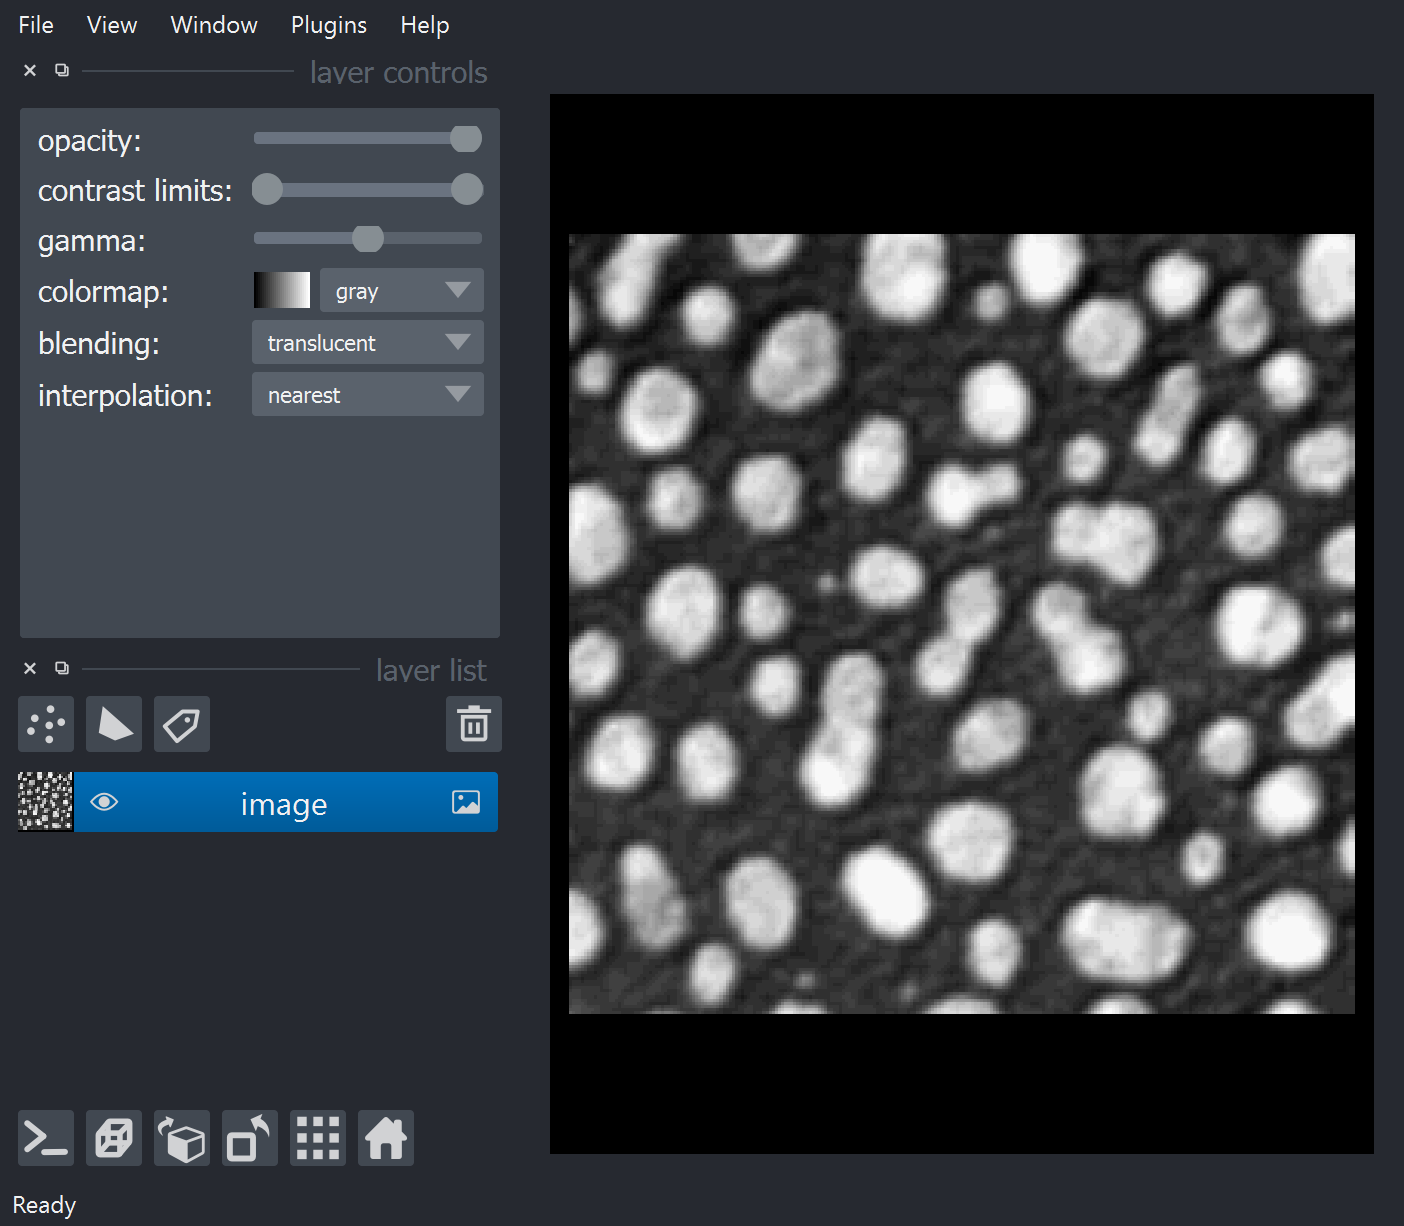

In [4]:
napari.utils.nbscreenshot(viewer)

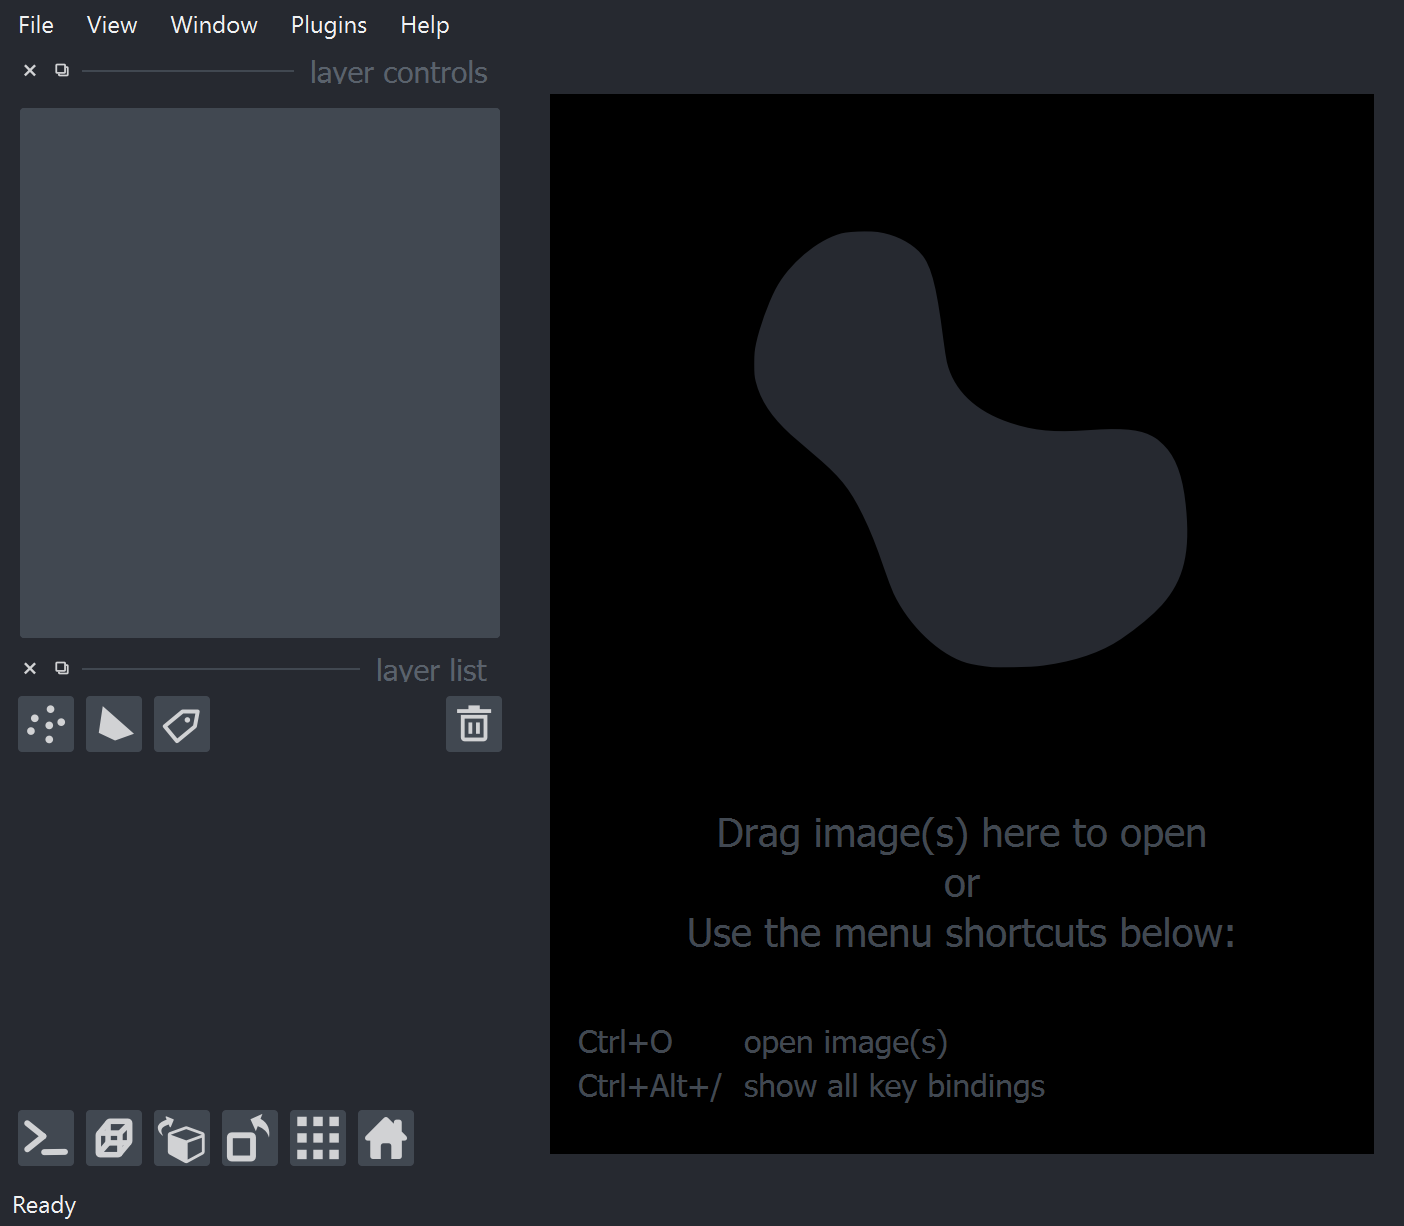

In [5]:
# Remove all layers to start from scratch
for l in viewer.layers:
    viewer.layers.remove(l)

napari.utils.nbscreenshot(viewer)

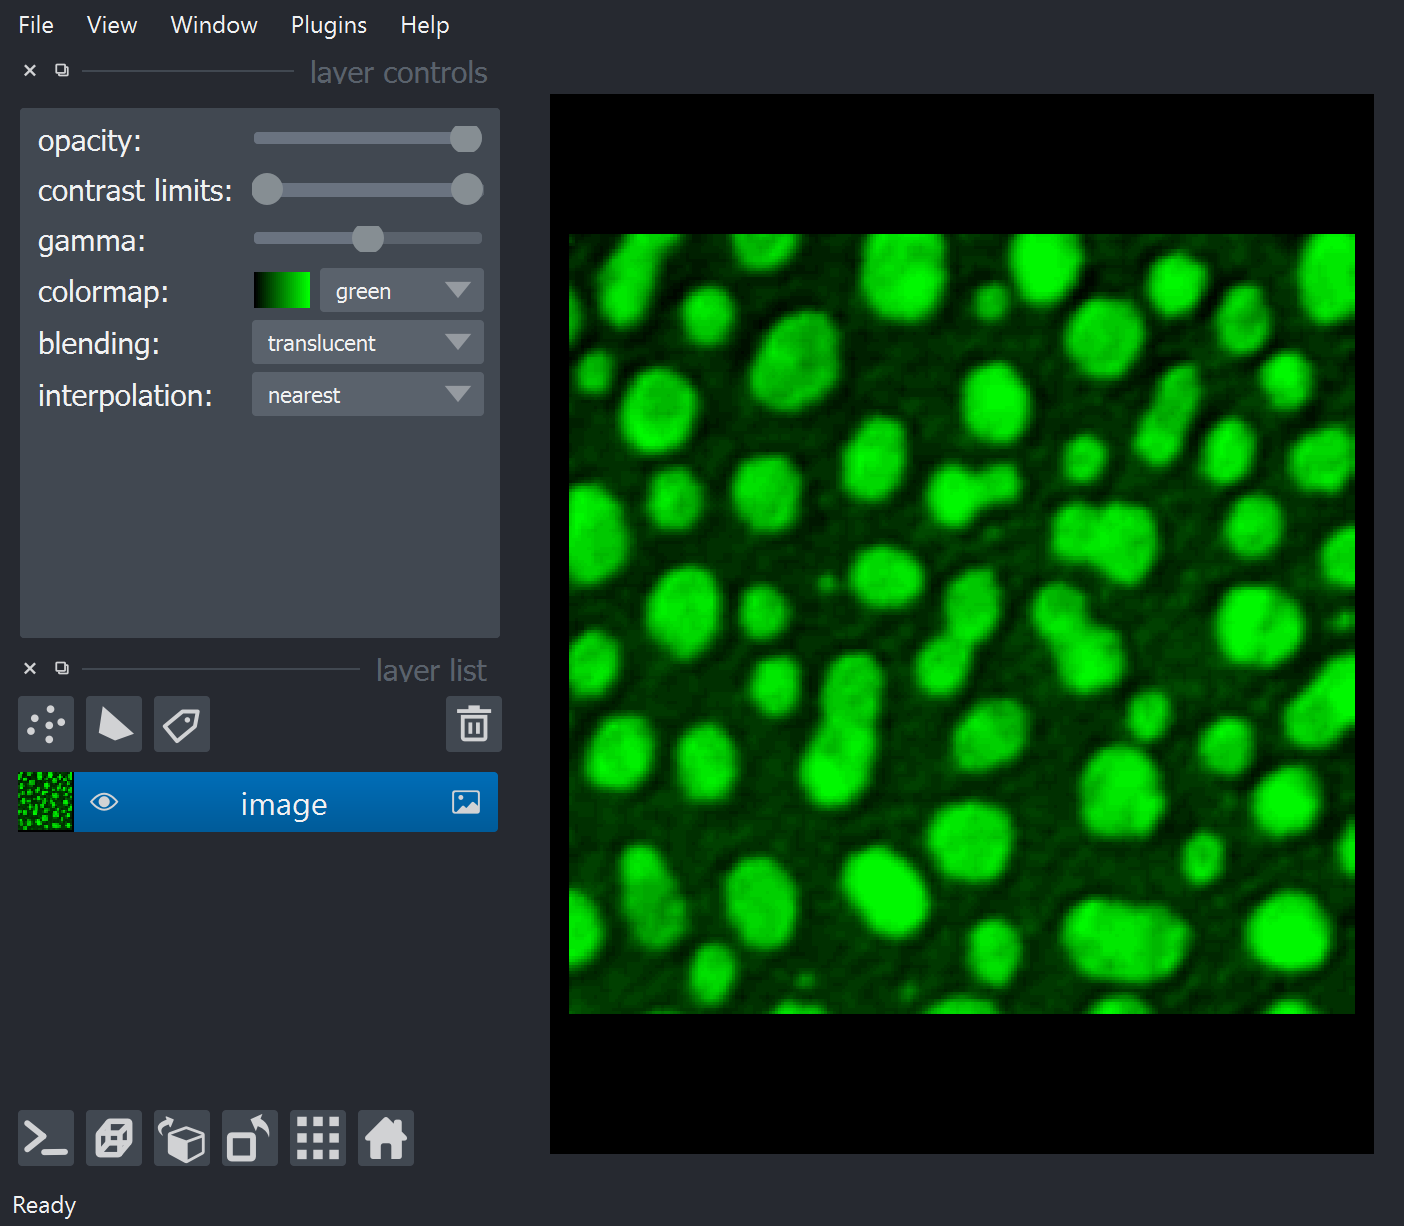

In [6]:
# add the image again and modify the lookup table
layer = viewer.add_image(image)

layer.colormap = 'green'

napari.utils.nbscreenshot(viewer)

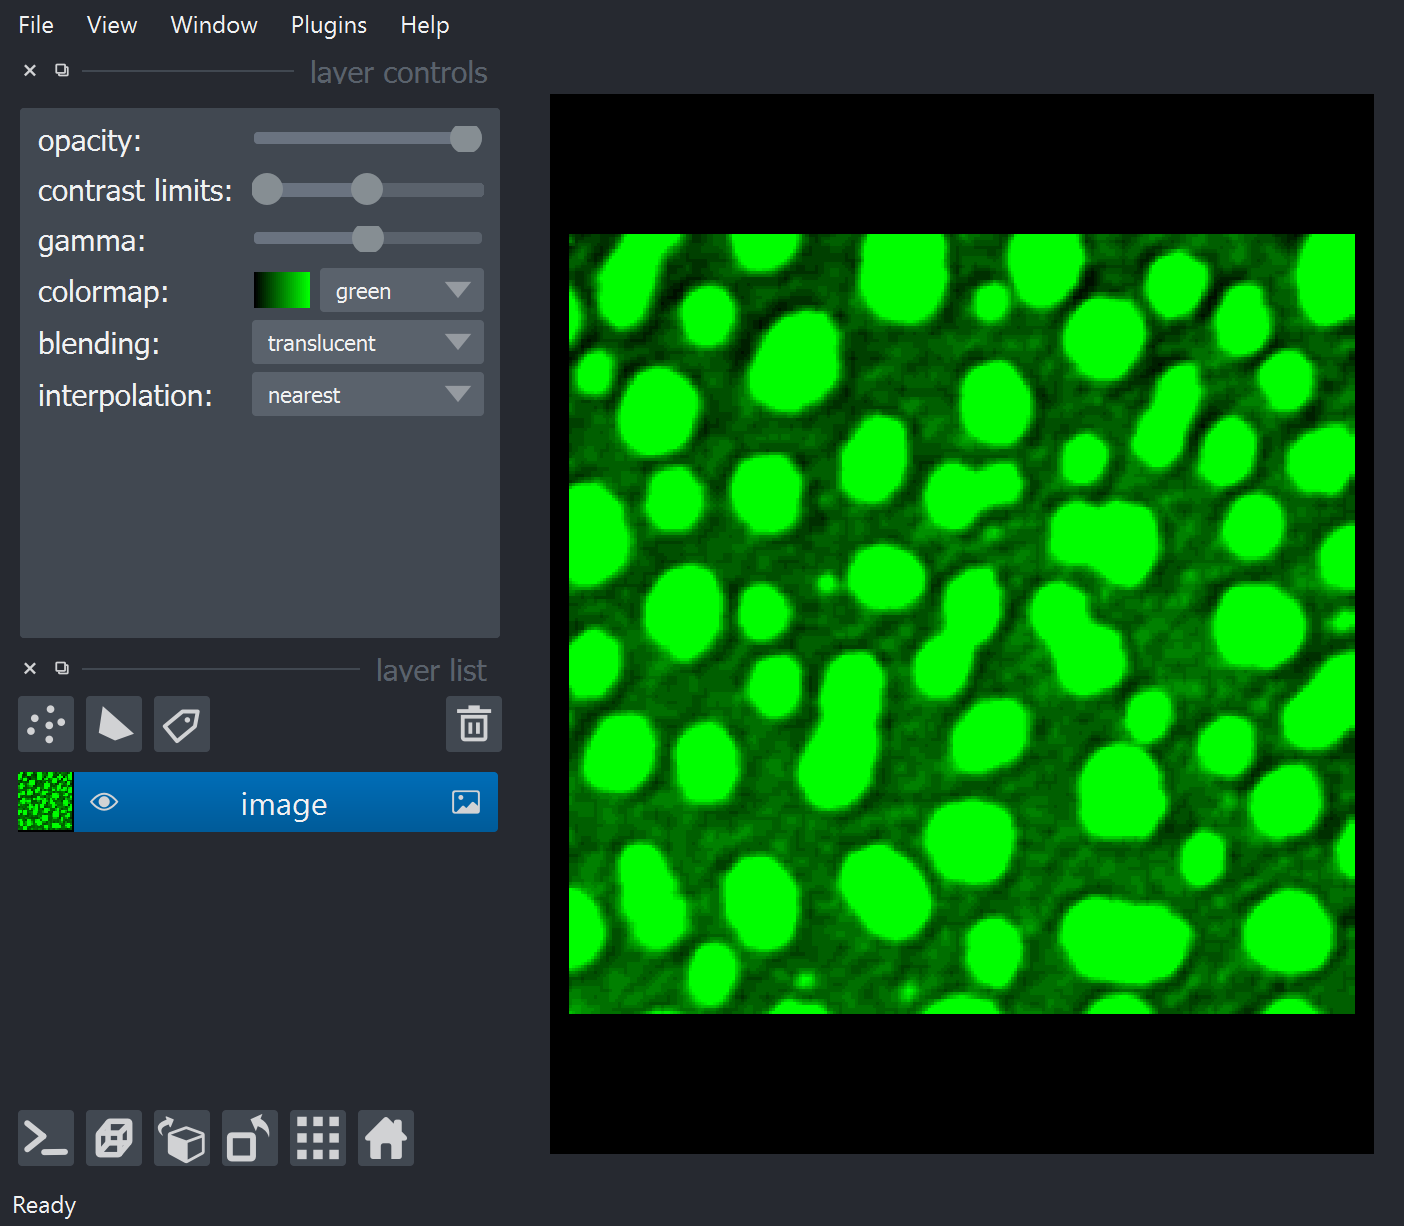

In [7]:
# modify brightness & contrast
layer.contrast_limits = (0, 128)

napari.utils.nbscreenshot(viewer)

# Image segmentation
We now blur the image and put it in the viewer

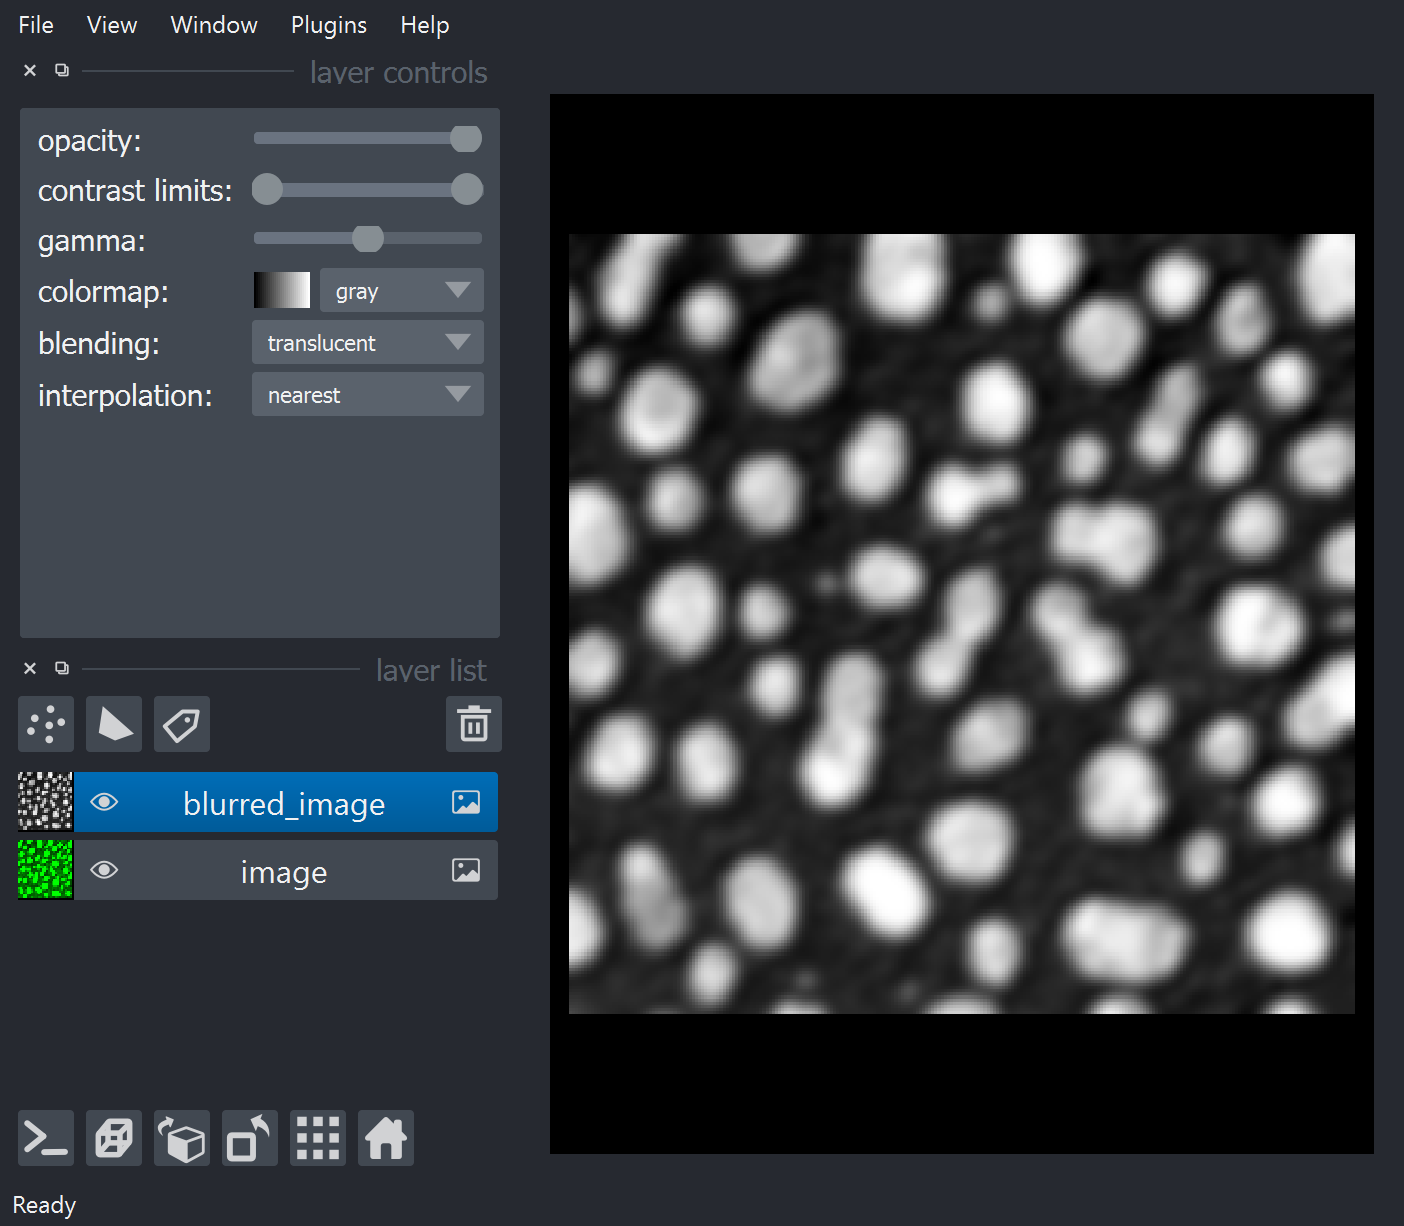

In [8]:
from skimage.filters import gaussian
blurred_image = gaussian(image, sigma=2)

# Add to napari
viewer.add_image(blurred_image)

napari.utils.nbscreenshot(viewer)

We now threshold the image and add it to the viewer

0.48307635389561887


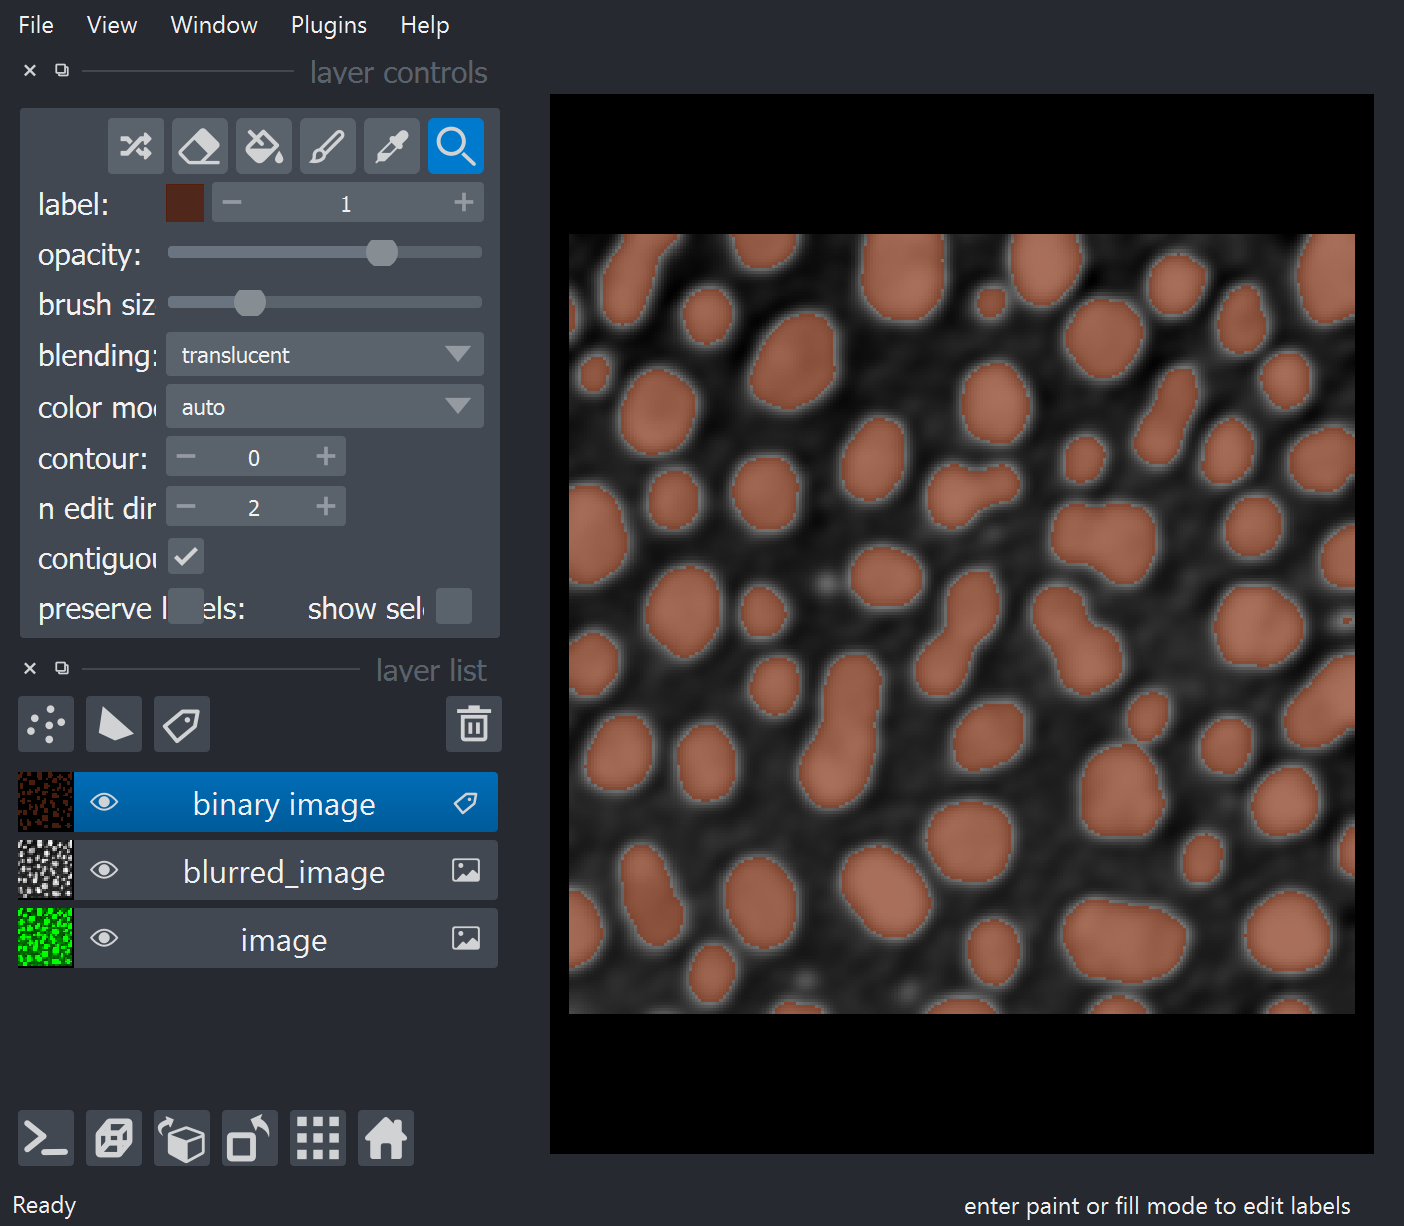

In [9]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(blurred_image)
print(threshold)
binary_image = blurred_image > threshold

# Add a new labels layer containing an image
binary_layer = viewer.add_labels(binary_image, name="binary image")

napari.utils.nbscreenshot(viewer)

In [11]:
# hide the binary image to make the next step better visible
binary_layer.visible = False

Connected component labeling allows us to identify individual objects.

In [12]:
from skimage.measure import label
label_image = label(binary_image)

# add labels to viewer
label_layer = viewer.add_labels(label_image)

You can visualize labelled objects as overlay (per default)

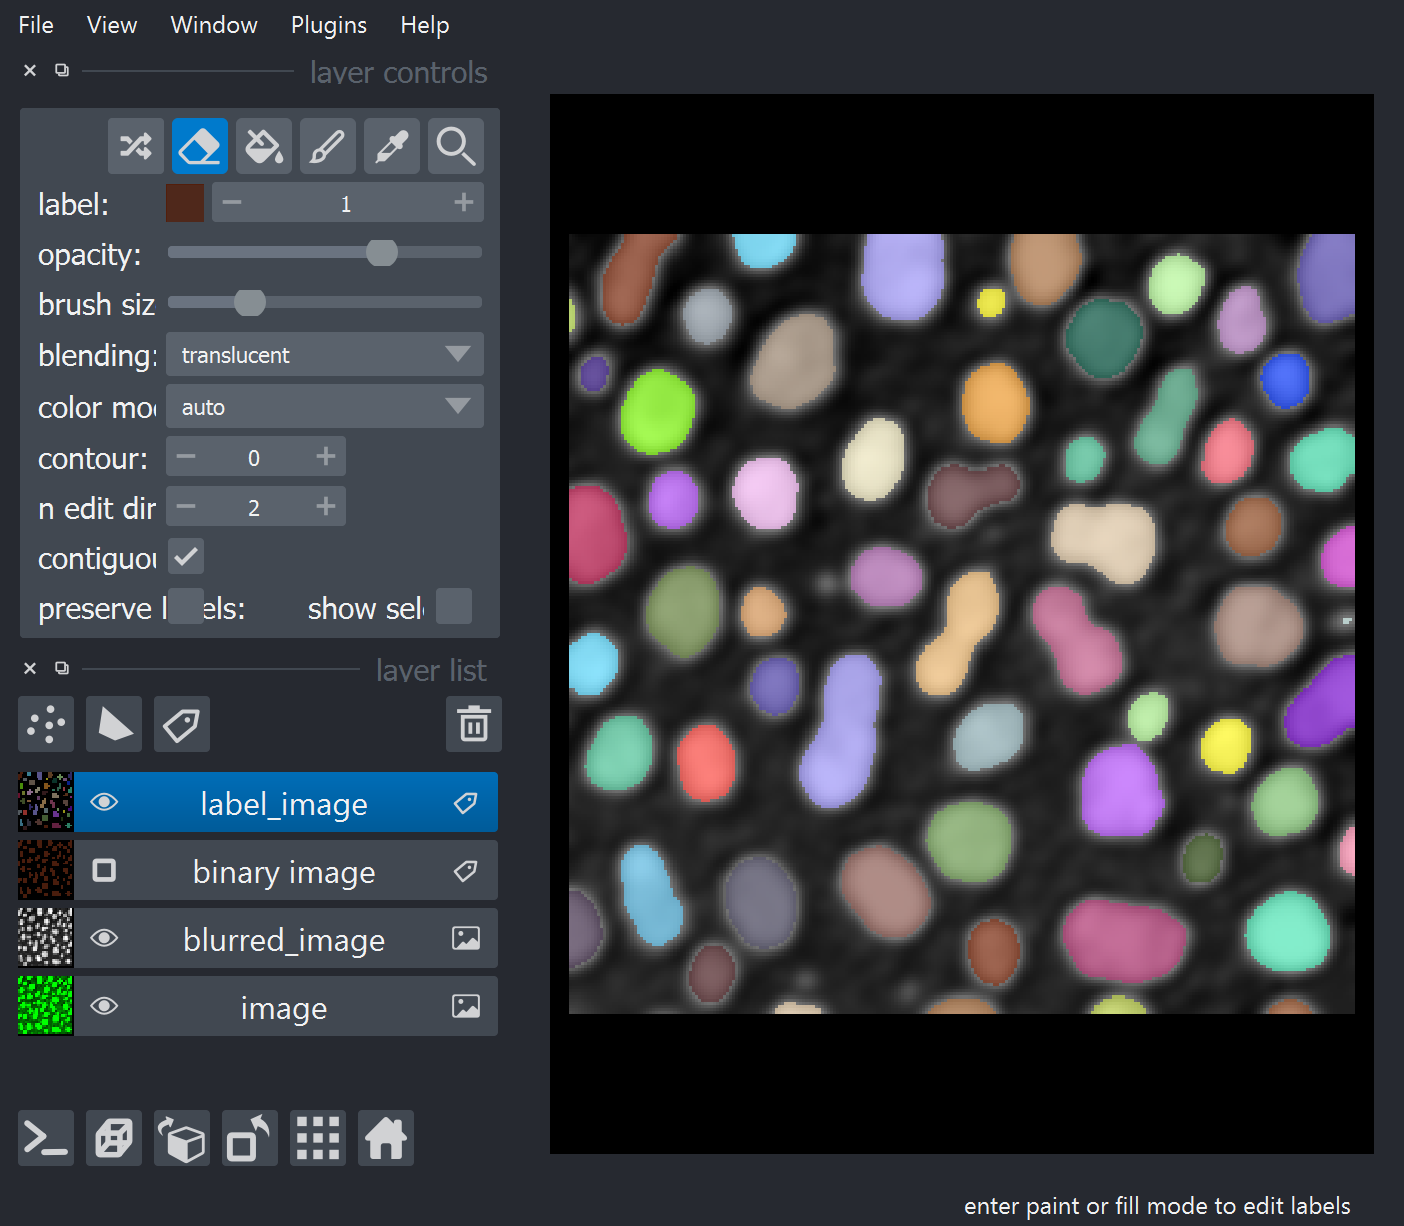

In [14]:
napari.utils.nbscreenshot(viewer)

... or as opaque contours

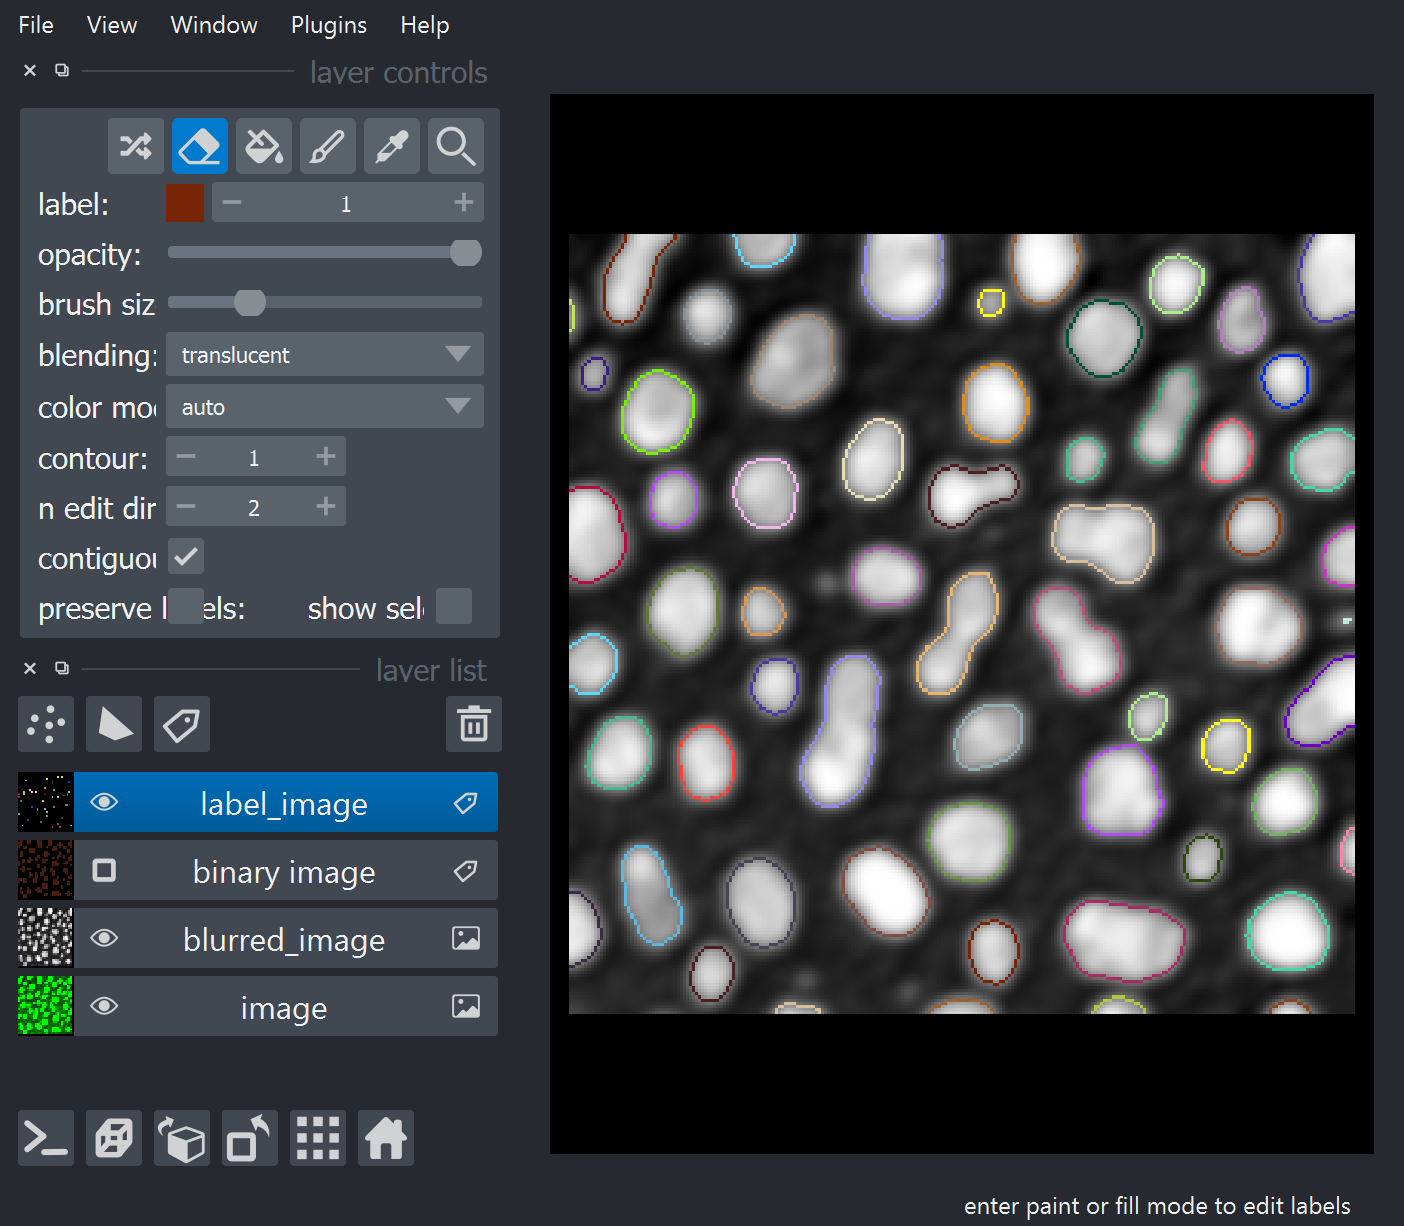

In [15]:
label_layer.contour = 1
label_layer.opacity = 1

napari.utils.nbscreenshot(viewer)

By clicking the galery button (buttom left), we can view the different images side by side

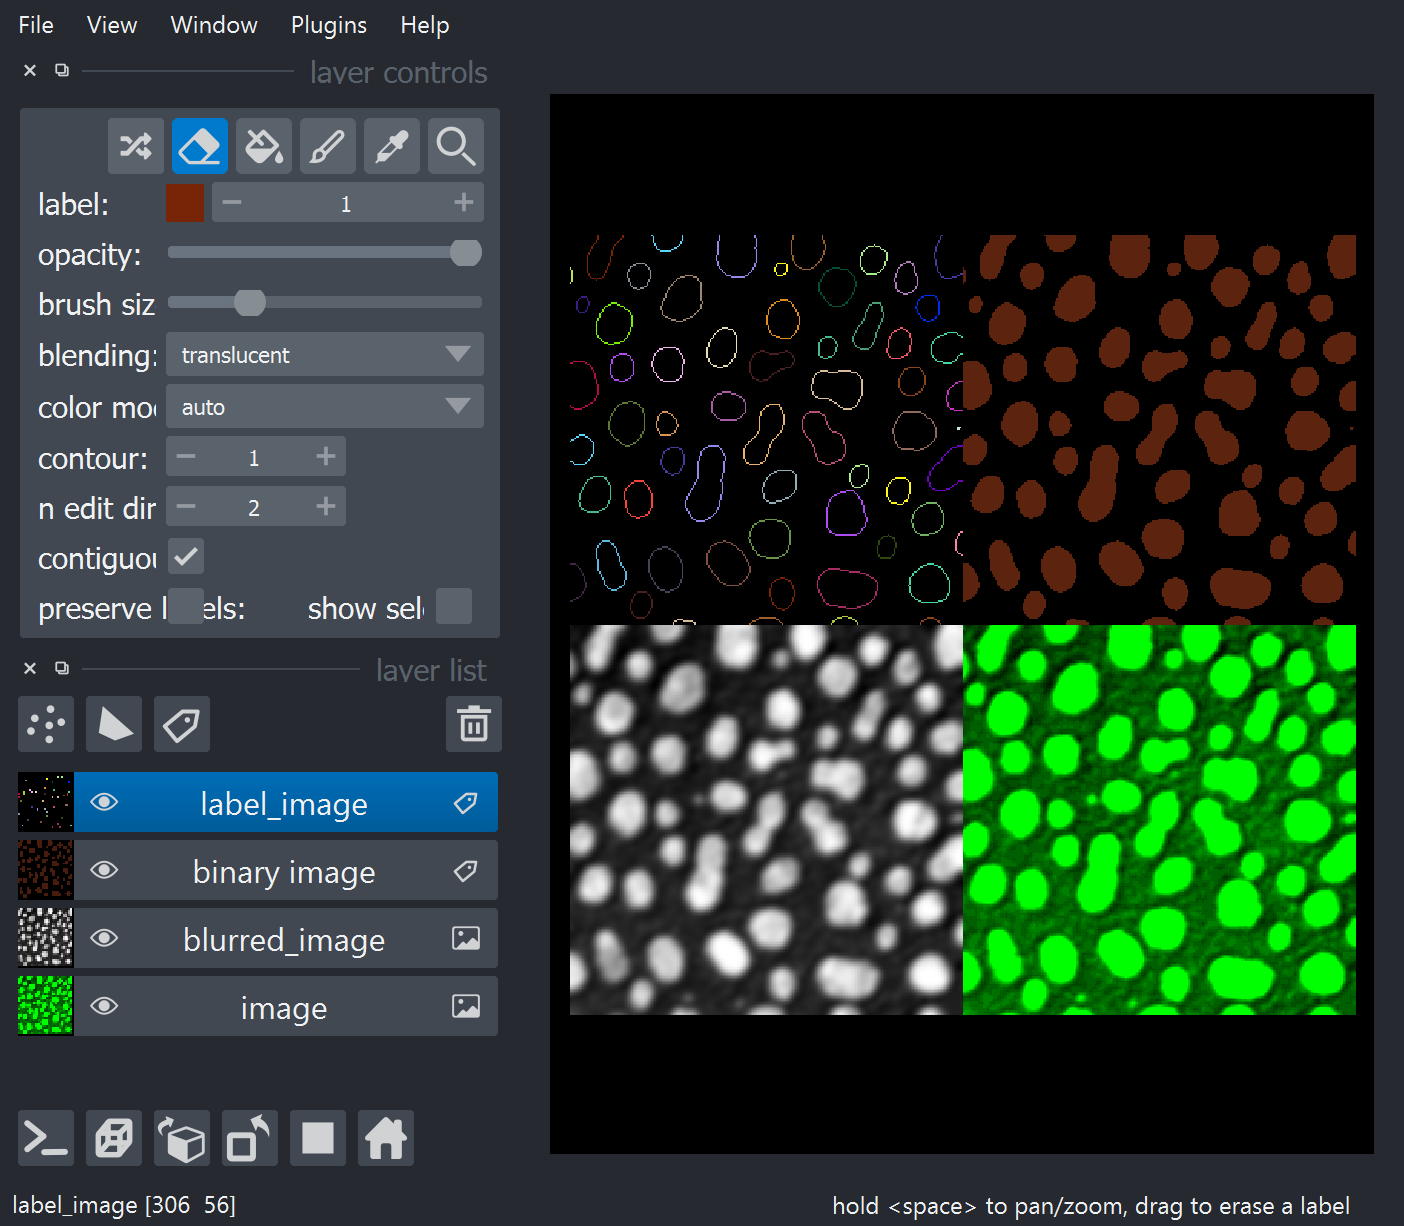

In [19]:
napari.utils.nbscreenshot(viewer)